In [16]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd
import xgboost as xgb
from scipy.stats import norm

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [17]:
XGBoost_distances_all_data = []

/home/ni/Downloads/Geant4 Data/output_nt_Hits_1mm.csv
Average XGBoost Delta X (mm): 0.13403026041625746
Median XGBoost Delta Y (mm): 0.0956772804260261


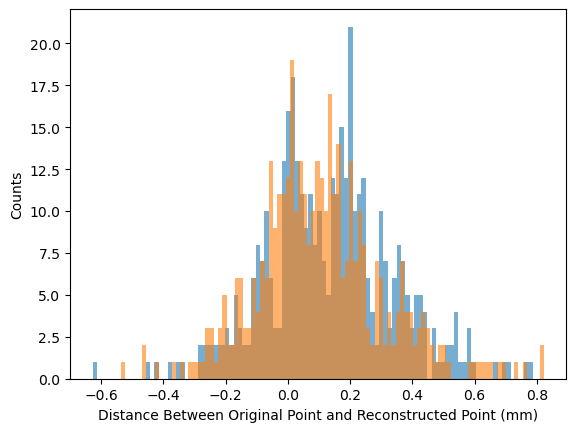

/home/ni/Downloads/Geant4 Data/output_nt_Hits_2mm.csv
Average XGBoost Delta X (mm): 0.15684101874314582
Median XGBoost Delta Y (mm): 0.10067000389099193


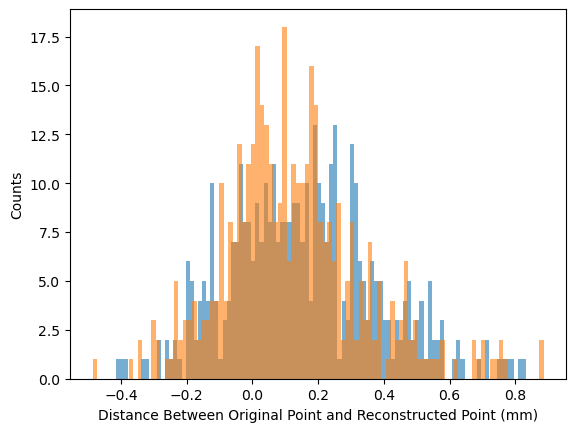

/home/ni/Downloads/Geant4 Data/output_nt_Hits_3mm.csv
Average XGBoost Delta X (mm): 0.13614505279857889
Median XGBoost Delta Y (mm): 0.08072309494018626


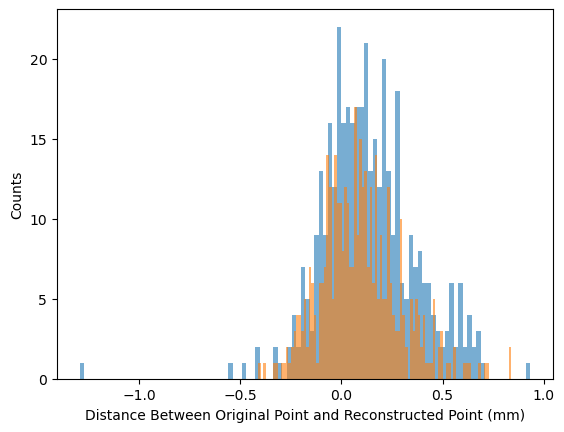

/home/ni/Downloads/Geant4 Data/output_nt_Hits_4mm.csv
Average XGBoost Delta X (mm): 0.11862793686100057
Median XGBoost Delta Y (mm): 0.07612571716308611


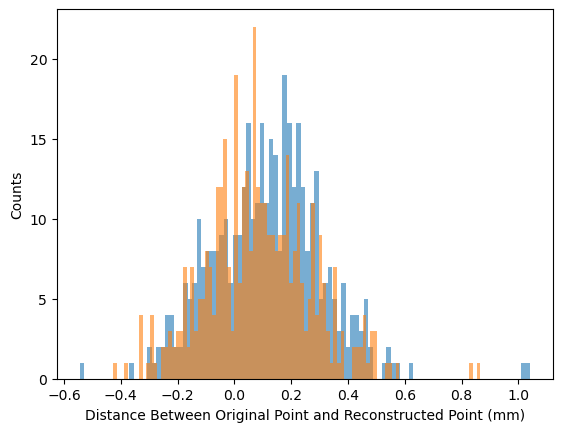

/home/ni/Downloads/Geant4 Data/output_nt_Hits_5mm.csv
Average XGBoost Delta X (mm): 0.13495209995258728
Median XGBoost Delta Y (mm): 0.0675893783569343


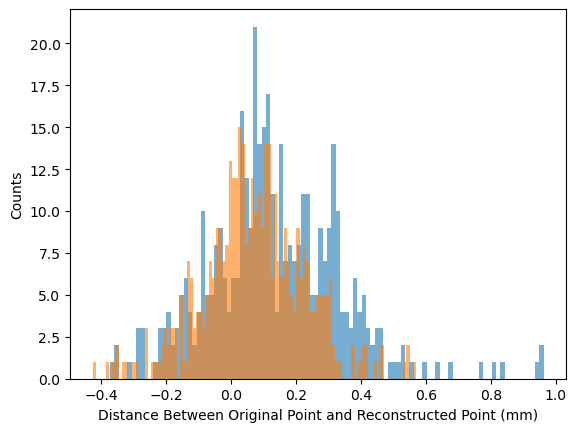

/home/ni/Downloads/Geant4 Data/output_nt_Hits_6mm.csv
Average XGBoost Delta X (mm): 0.0988997410678198
Median XGBoost Delta Y (mm): 0.05924367904663157


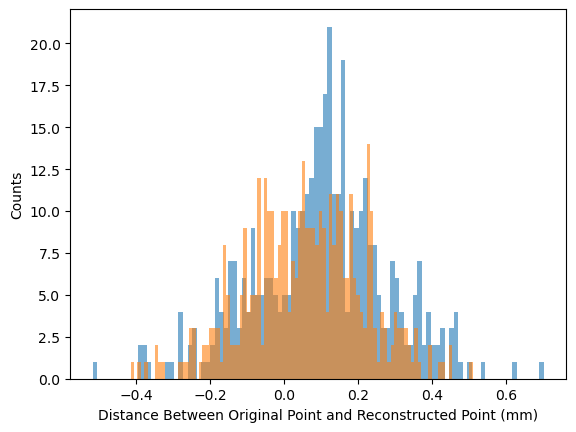

/home/ni/Downloads/Geant4 Data/output_nt_Hits_7mm.csv
Average XGBoost Delta X (mm): 0.0868758089285557
Median XGBoost Delta Y (mm): 0.05380744934082102


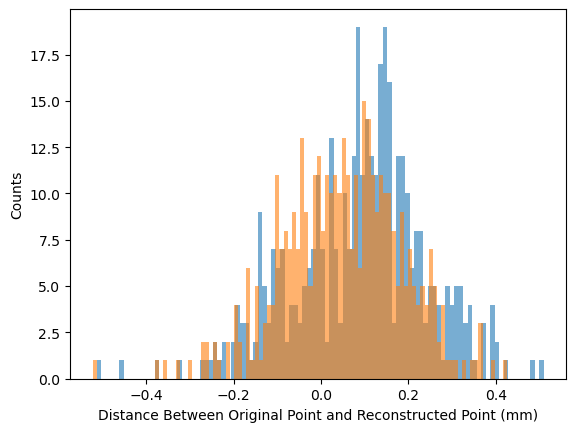

/home/ni/Downloads/Geant4 Data/output_nt_Hits_8mm.csv
Average XGBoost Delta X (mm): 0.07951304750338622
Median XGBoost Delta Y (mm): 0.04243717193603587


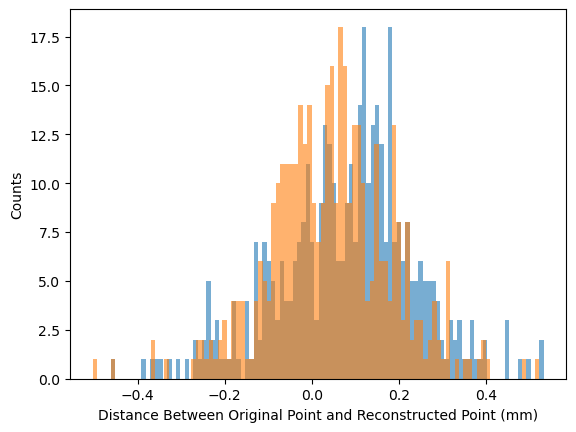

/home/ni/Downloads/Geant4 Data/output_nt_Hits_9mm.csv
Average XGBoost Delta X (mm): 0.06818204317357743
Median XGBoost Delta Y (mm): 0.04831752777099592


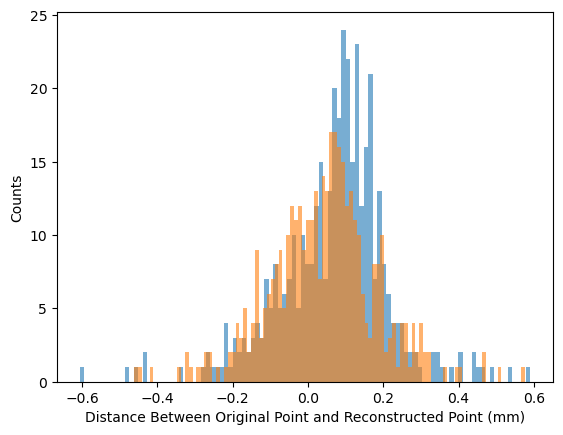

/home/ni/Downloads/Geant4 Data/output_nt_Hits_10mm.csv
Average XGBoost Delta X (mm): 0.05752427458753856
Median XGBoost Delta Y (mm): 0.03513941764831561


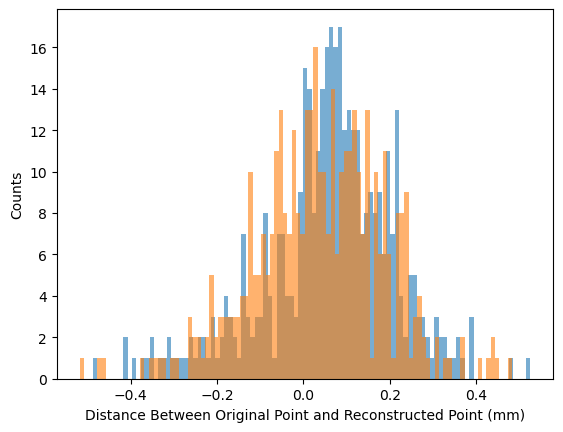

/home/ni/Downloads/Geant4 Data/output_nt_Hits_11mm.csv
Average XGBoost Delta X (mm): 0.08589228067097639
Median XGBoost Delta Y (mm): 0.03134371042251614


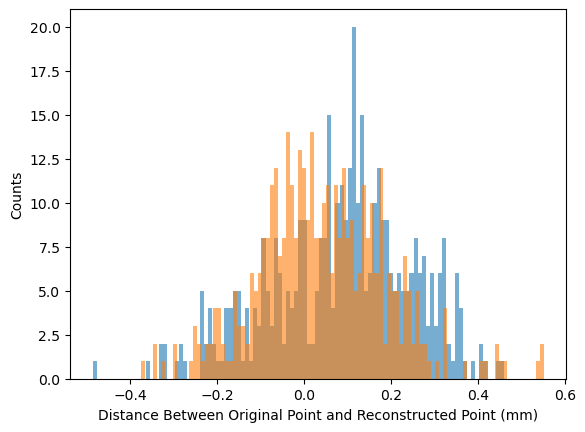

/home/ni/Downloads/Geant4 Data/output_nt_Hits_12mm.csv
Average XGBoost Delta X (mm): 0.10026358691373127
Median XGBoost Delta Y (mm): 0.0709056854248054


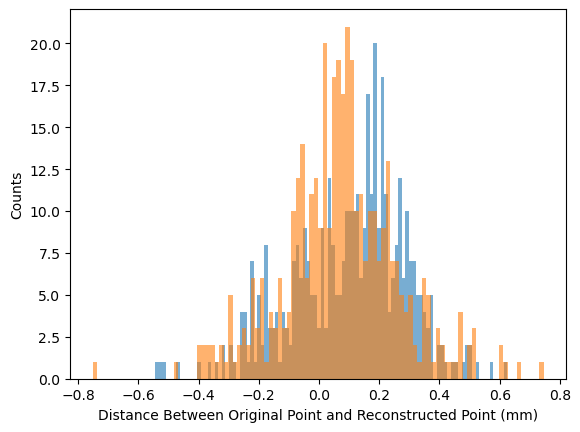

/home/ni/Downloads/Geant4 Data/output_nt_Hits_13mm.csv
Average XGBoost Delta X (mm): 0.11064633404215175
Median XGBoost Delta Y (mm): 0.07522735595703195


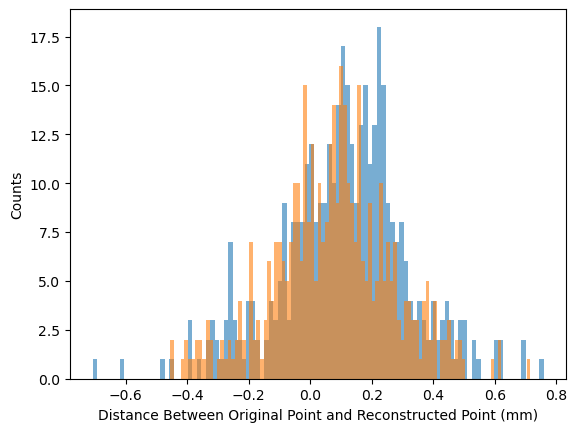

/home/ni/Downloads/Geant4 Data/output_nt_Hits_14mm.csv
Average XGBoost Delta X (mm): 0.11947436101377863
Median XGBoost Delta Y (mm): 0.08881897926330548


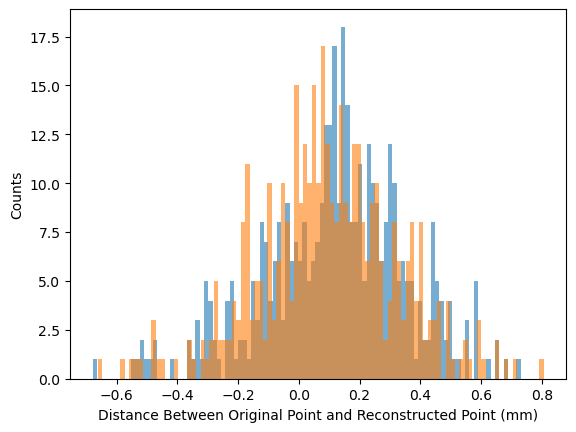

/home/ni/Downloads/Geant4 Data/output_nt_Hits_15mm.csv
Average XGBoost Delta X (mm): 0.17325731590957802
Median XGBoost Delta Y (mm): 0.11970167160034162


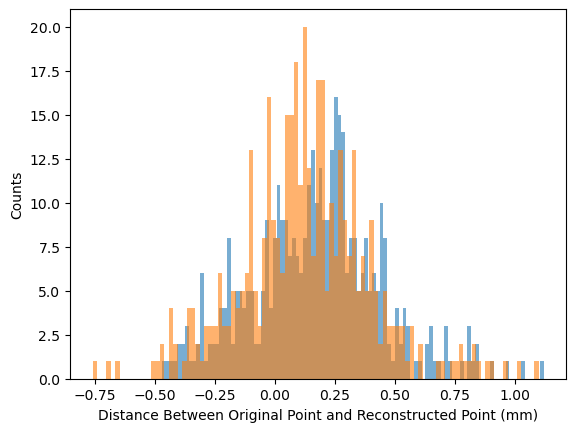

/home/ni/Downloads/Geant4 Data/output_nt_Hits_25mm.csv
Average XGBoost Delta X (mm): 0.24029470878555925
Median XGBoost Delta Y (mm): 0.22615138292312653


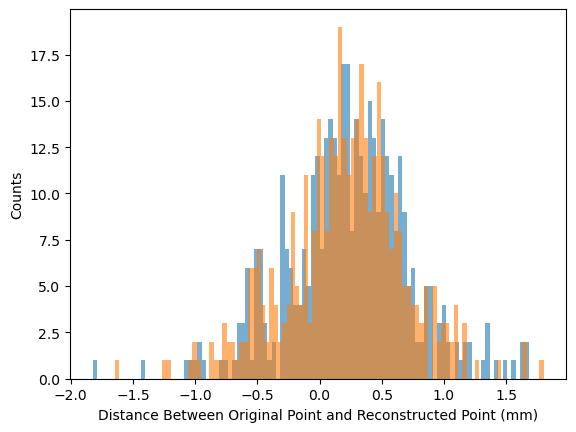

/home/ni/Downloads/Geant4 Data/output_nt_Hits_45mm.csv
Average XGBoost Delta X (mm): 0.9756911998314651
Median XGBoost Delta Y (mm): 0.9652127265930172


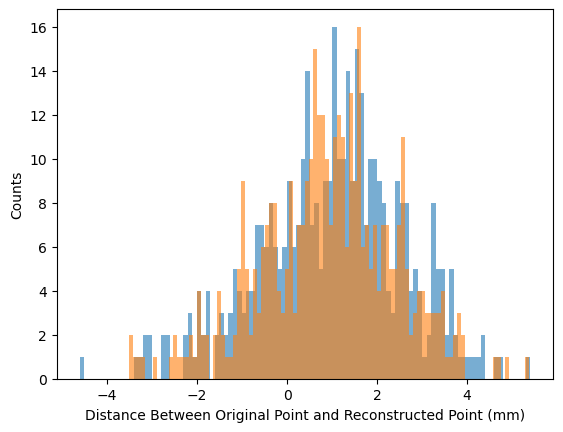

In [18]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 45]
for q in numbers:
    #getting X data
    #file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
    file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    print('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    csvreader = csv.reader(file)
    #first 13 rows aren't needed
    line_count = 0;
    original_X = []
    for row in csvreader:
      if line_count >= 13:
        original_X.append([int(i) for i in row])
      line_count += 1
    
    
    #getting Y data
    original_y = []
    for i in range(-122, 1):
      for j in range(-122, 1):
        original_y.append([i*0.2, j*0.2])

    
    #reconstructing
    size = 100
    num_X = np.array(original_X).reshape(123,123,9)
    num_y = np.array(original_y).reshape(123,123,2)
    num_X = num_X[122-size:,122-size:,:]
    num_y = num_y[122-size:,122-size:,:]
    bottom_right_X = []
    bottom_right_y = []
    for i in range(-size, 0):
      for j in range(-size, 1):
        tmp_X = copy.deepcopy(num_X[i+size][j+size])
        tmp_y = copy.deepcopy(num_y[i+size][j+size])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        bottom_right_X.append(tmp_X)
        bottom_right_y.append(tmp_y)
    
    bottom_right_X = np.array(bottom_right_X).reshape(size,size+1,9)
    bottom_right_y = np.array(bottom_right_y).reshape(size,size+1,2)
    
    top_left_X = []
    top_left_y = []
    for i in range(-size, 1):
      for j in range(-size, 0):
        tmp_X = copy.deepcopy(num_X[i+size][j+size])
        tmp_y = copy.deepcopy(num_y[i+size][j+size])
        #mirroring
        tmp_y[1] = -tmp_y[1]
        for k in range(3):
          tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
        top_left_X.append(tmp_X)
        top_left_y.append(tmp_y)
    
    top_left_X = np.array(top_left_X).reshape(size+1,size,9)
    top_left_y = np.array(top_left_y).reshape(size+1,size,2)
    
    top_right_X = []
    top_right_y = []
    for i in range(-size, 0):
      for j in range(-size, 0):
        tmp_X = copy.deepcopy(top_left_X[i+size][j+size])
        tmp_y = copy.deepcopy(top_left_y[i+size][j+size])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        top_right_X.append(tmp_X)
        top_right_y.append(tmp_y)
    
    top_right_X = np.array(top_right_X).reshape(size,size,9)
    top_right_y = np.array(top_right_y).reshape(size,size,2)
    
    #converting to numpy array
    X = np.concatenate((num_X.reshape((size + 1) * (size + 1), 9), bottom_right_X.reshape(size * (size + 1), 9), top_left_X.reshape(size * (size + 1), 9), top_right_X.reshape(size * size, 9)))
    y = np.concatenate((num_y.reshape((size + 1) * (size + 1), 2), bottom_right_y.reshape(size * (size + 1), 2), top_left_y.reshape(size * (size + 1), 2), top_right_y.reshape(size * size, 2)))
    
    #training
    XGBoost_distances = np.zeros((2*size + 1,2*size + 1,2))
    scaler = StandardScaler()
    for k in range(10):
        X_XGBoost = scaler.fit_transform(X)
        X_train, X_val, y_train, y_val = train_test_split(X_XGBoost, y, test_size=0.3)
    
        model = xgb.XGBRegressor()
        model.fit(X_train, y_train)
        
        #finding distances
        yhat = model.predict(X_XGBoost)
        for i in range(len(X)):
            #finding average of each point
            XGBoost_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][0] = k / (k + 1) * XGBoost_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][0] + 1 / (k + 1) * (yhat[i][0] - y[i][0])
            XGBoost_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][1] = k / (k + 1) * XGBoost_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][1] + 1 / (k + 1) * (yhat[i][1] - y[i][1])
    
    print("Average XGBoost Delta X (mm): " + str(np.average(XGBoost_distances[:][:][0])))
    print("Median XGBoost Delta Y (mm): " + str(np.median(XGBoost_distances[:][:][1])))

    plt.hist(XGBoost_distances[:][:][0].ravel(), bins=100, alpha=0.6, label='delta X')
    plt.hist(XGBoost_distances[:][:][1].ravel(), bins=100, alpha=0.6, label='delta Y')
    plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
    plt.ylabel('Counts')
    plt.show()
    
    #getting data setup for colormap for XGBoost
    #yhat_temp = model.predict(X)
    #xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
    #yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
    #creating colormap
    #plt.figure(figsize=(8, 6))
    #plt.pcolormesh(xaxis, yaxis, XGBoost_distances, shading='auto', cmap='viridis')
    
    # Add color bar
    #plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')
    
    # Add labels and title
    #plt.xlabel('X (mm)')
    #plt.ylabel('Y (mm)')
    #plt.title('Accuracy of XGBoost')
    
    # Display the plot
    #plt.show()
    
    XGBoost_distances_all_data.append(XGBoost_distances)

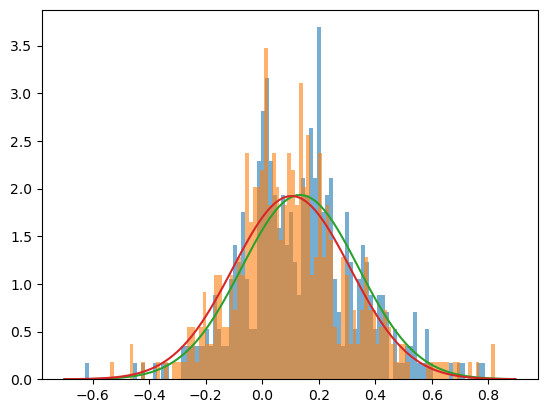

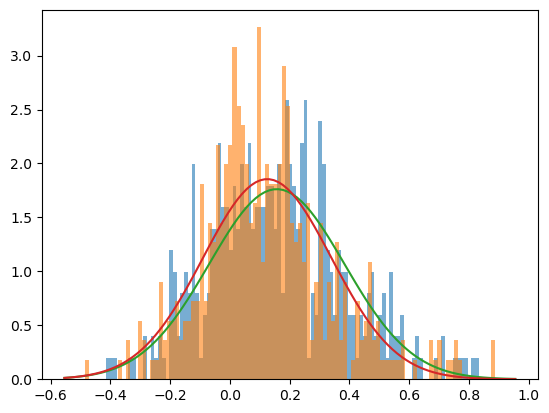

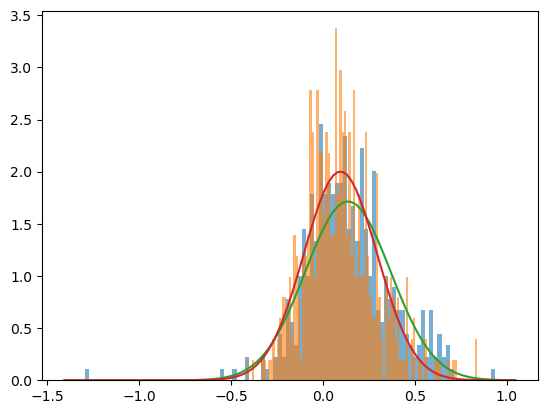

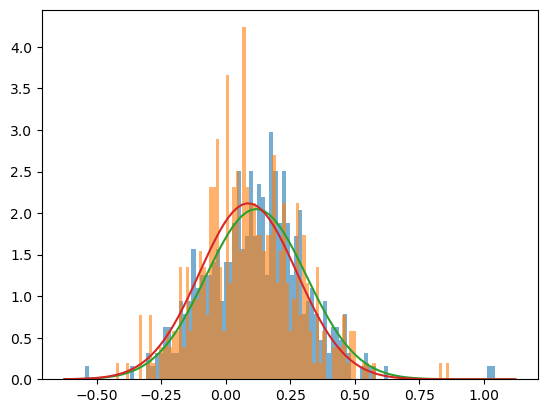

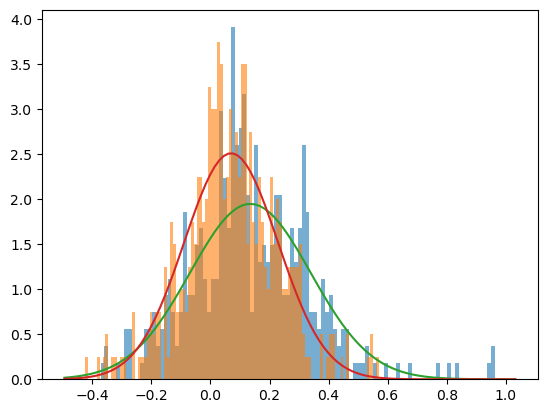

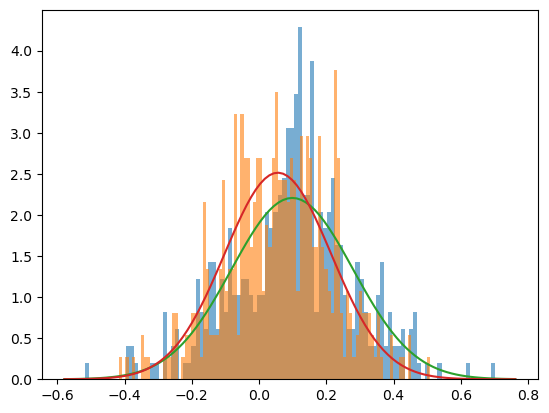

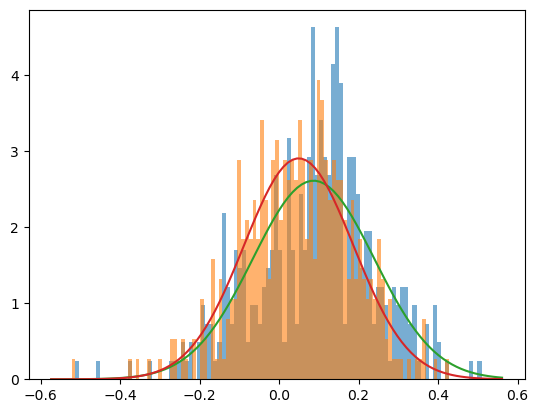

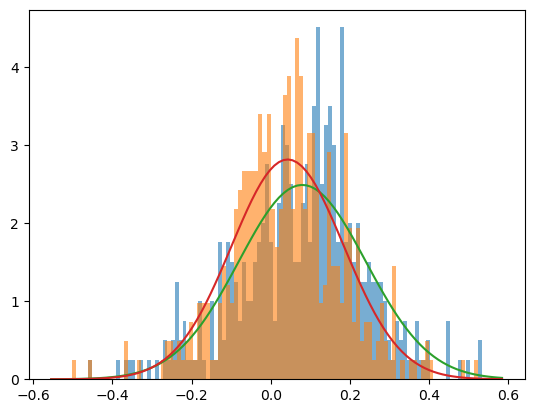

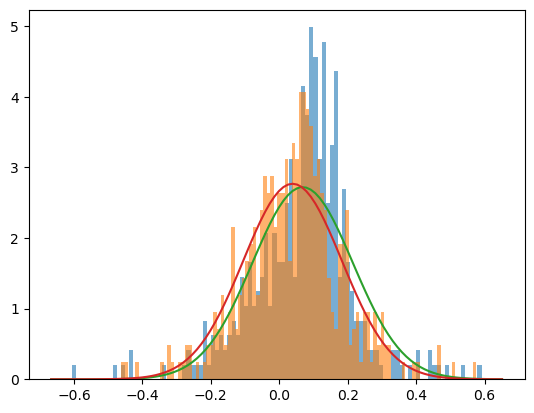

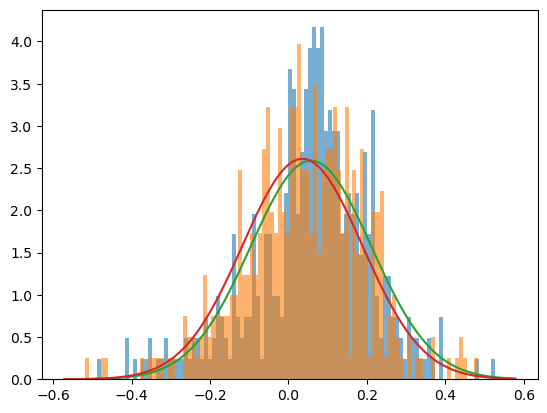

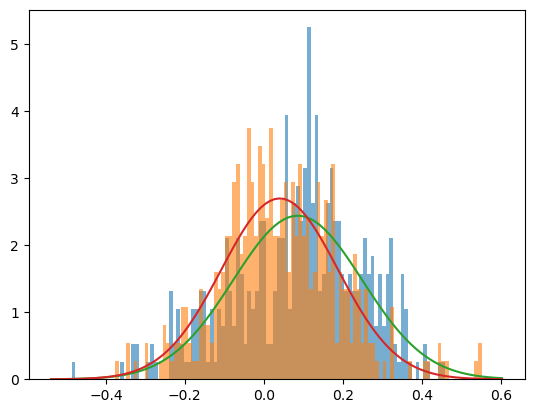

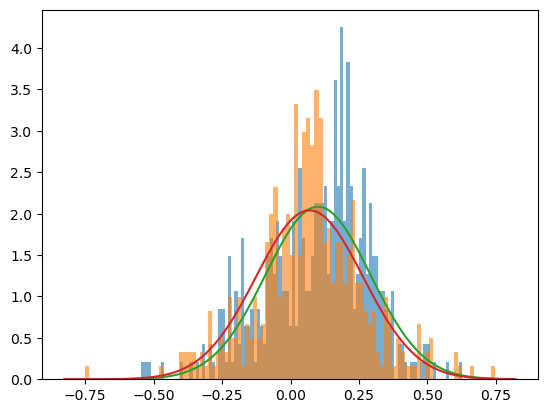

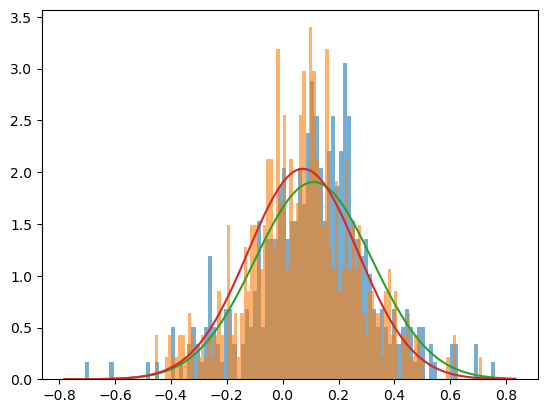

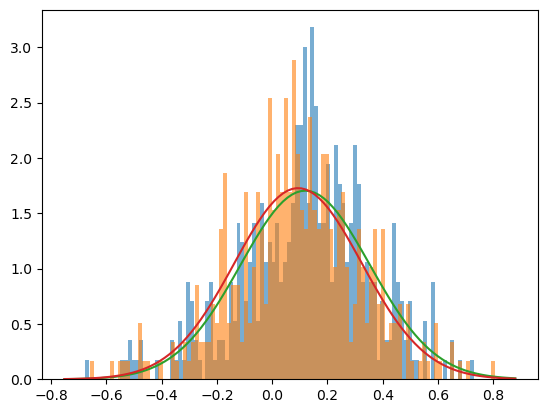

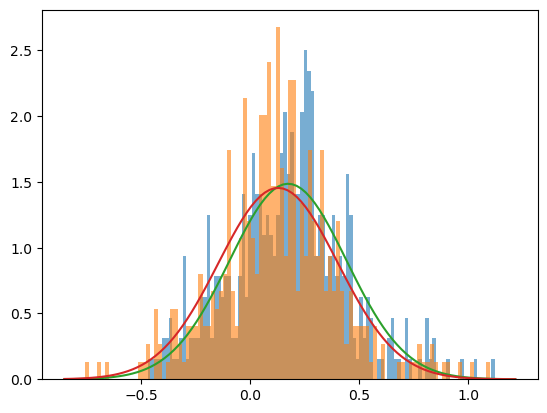

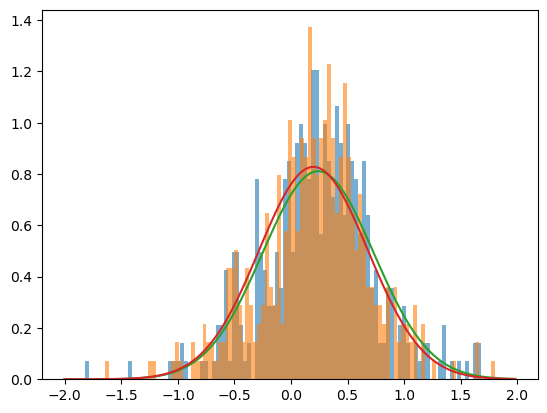

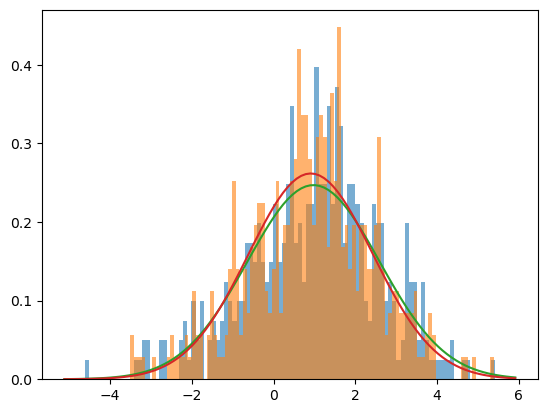

In [19]:
standard_deviations = []
means = []

for element in XGBoost_distances_all_data:
    meanx,stdx=norm.fit(element[:][:][0].ravel())
    meany,stdy=norm.fit(element[:][:][1].ravel())
    standard_deviations.append([stdx, stdy])
    means.append([meanx, meany])
    plt.hist(element[:][:][0].ravel(), bins=100, alpha=0.6, label='delta X', density=True)
    plt.hist(element[:][:][1].ravel(), bins=100, alpha=0.6, label='delta Y', density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    xy = norm.pdf(x, meanx, stdx)
    yy = norm.pdf(x, meany, stdy)
    plt.plot(x, xy)
    plt.plot(x, yy)
    plt.show()

In [20]:
print([standard_deviations[9][0]*2.355, standard_deviations[9][1]*2.355])

[0.362716932282583, 0.35975148598931744]


In [21]:
XGBoost_distances_all_data_np = np.array(XGBoost_distances_all_data)
np.savetxt('XGBoost_distances_delta_cut.csv', XGBoost_distances_all_data_np.reshape(XGBoost_distances_all_data_np.shape[0], -1))

#print(XGBoost_distances_all_data_np.shape)